In [1]:
# visualize dataset without outliers
from pandas import read_csv
from matplotlib import pyplot
import pandas as pd

# load the dataset
data_m1 = read_csv('/Users/admin/Desktop/PKS/MTechSem4_2021/MTP1/Dataset/M1_1/M1_data.csv', sep = '\t')
data_m3 = read_csv('/Users/admin/Desktop/PKS/MTechSem4_2021/MTP1/Dataset/M3_2/M3_data.csv', sep = '\t')
data_m4 = read_csv('/Users/admin/Desktop/PKS/MTechSem4_2021/MTP1/Dataset/M4_1/M4_data.csv', sep = '\t')

data_c1 = read_csv('/Users/admin/Desktop/PKS/MTechSem4_2021/MTP1/Dataset/C1/C1_data.csv', sep = '\t')
data_c2 = read_csv('/Users/admin/Desktop/PKS/MTechSem4_2021/MTP1/Dataset/C2/C2_data.csv', sep = '\t')
data_c3 = read_csv('/Users/admin/Desktop/PKS/MTechSem4_2021/MTP1/Dataset/C3/C3_data.csv', sep = '\t')


# retrieve data as numpy array
values_m1 = data_m1.values
values_m2 = data_m3.values
values_m3 = data_m4.values

values_c1 = data_c1.values
values_c2 = data_c2.values
values_c3 = data_c3.values


In [2]:
# importing library
import numpy

from pandas import read_csv
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from numpy import array

# split data into inputs and outputs. Data chunk size=1024. Handling 50 chunks=1024x50=51200 Rows.
# Left first column which has time sequence value
X1 = values_m1[0:51200, 1:]
y1 = []
# print(X1.shape)
for j in range(0, 51200):
    y1.append(1)#Migraine=1
    
y1 = numpy.array(y1)
# y1.shape
# print(len(y))
print(X1.shape, y1.shape)

X2 = values_c1[0:51200, 1:]
y2 = []
# print(X2.shape)
for j in range(0, 51200):
    y2.append(0)#Control=0

y2 = numpy.array(y2)
# y2.shape
print(X2.shape, y2.shape)


X3 = values_m2[0:51200, 1:]
y3 = []
for j in range(0, 51200):
    y3.append(1)#Migraine=1
y3 = numpy.array(y3)
print(X3.shape, y3.shape)

X4 = values_c2[0:51200, 1:]
y4 = []
for j in range(0, 51200):
    y4.append(0)#Control=0
y4 = numpy.array(y4)
print(X4.shape, y4.shape)


X5 = values_m3[0:51200, 1:]
y5 = []
for j in range(0, 51200):
    y5.append(1)#Migraine=1
y5 = numpy.array(y5)
print(X5.shape, y5.shape)

X6 = values_c3[0:51200, 1:]
y6 = []
for j in range(0, 51200):
    y6.append(0)#Control=0
y6 = numpy.array(y6)
print(X6.shape, y6.shape)

# data_m1 = pd.concat([data_m1, data_c1], ignore_index=True)
X = numpy.concatenate((X1, X2, X3, X4, X5, X6,), axis=0)
y = numpy.concatenate([y1, y2, y3, y4, y5, y6], axis=0)
print('After concat: ')
print(X.shape, y.shape)


from sklearn.preprocessing import StandardScaler
# Apply StandardScaler.
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

# split the dataset
trainX, testX, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False, random_state=1)

# reshape input to be 3D [samples, timesteps, features]
X_train = numpy.reshape(trainX, (trainX.shape[0], 1, X.shape[1]))
X_test = numpy.reshape(testX, (testX.shape[0], 1, X.shape[1]))
print(X_train.shape, X_test.shape)

(51200, 143) (51200,)
(51200, 143) (51200,)
(51200, 143) (51200,)
(51200, 143) (51200,)
(51200, 143) (51200,)
(51200, 143) (51200,)
After concat: 
(307200, 143) (307200,)
(230400, 1, 143) (76800, 1, 143)


In [3]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import LSTM

from keras.layers import Bidirectional
from keras.layers import RepeatVector
from keras.layers import TimeDistributed

print(X_train.shape[2])

model = Sequential()
# model.add(Bidirectional(LSTM(50, activation='relu', input_shape=(1,X_train.shape[2]), return_sequences=True)))
model.add(Bidirectional(LSTM(200, activation='relu', input_shape=(1,X_train.shape[2]), return_sequences=True)))
model.add(TimeDistributed(Dense(1)))
model.compile(loss='mae', optimizer='adam', metrics=['acc'])

# model = Sequential()
# model.add(LSTM(128, input_shape=(1,X_train.shape[2]), activation='relu', return_sequences=True))
# model.add(Dropout(0.4))
# model.add(LSTM(128, activation='relu'))
# model.add(Dropout(0.4))
# model.add(Dense(3, activation='relu'))
# model.compile(loss='mse', optimizer='adam', metrics=['acc'])
# model.summary()


143


In [4]:
from keras.callbacks import EarlyStopping

earlyStop = EarlyStopping(monitor="val_acc", verbose=2, mode='min', patience=90)
history = model.fit(X_train, y_train, epochs=100, batch_size=2048, validation_data=(X_test,y_test), callbacks=[earlyStop])


Epoch 1/100
113/113 [==============================] - 21s 156ms/step - loss: 0.3620 - acc: 0.7110 - val_loss: 0.4104 - val_acc: 0.5965
Epoch 2/100
113/113 [==============================] - 16s 140ms/step - loss: 0.1242 - acc: 0.9971 - val_loss: 0.2860 - val_acc: 0.7987
Epoch 3/100
113/113 [==============================] - 16s 143ms/step - loss: 0.0823 - acc: 0.9991 - val_loss: 0.2665 - val_acc: 0.8373
Epoch 4/100
113/113 [==============================] - 16s 145ms/step - loss: 0.0671 - acc: 0.9995 - val_loss: 0.2508 - val_acc: 0.8668
Epoch 5/100
113/113 [==============================] - 16s 145ms/step - loss: 0.0592 - acc: 0.9998 - val_loss: 0.2463 - val_acc: 0.8805
Epoch 6/100
113/113 [==============================] - 18s 162ms/step - loss: 0.0544 - acc: 0.9998 - val_loss: 0.2456 - val_acc: 0.8838
Epoch 7/100
113/113 [==============================] - 18s 163ms/step - loss: 0.0510 - acc: 0.9999 - val_loss: 0.2444 - val_acc: 0.8851
Epoch 8/100
113/113 [===========================

Epoch 61/100
113/113 [==============================] - 15s 129ms/step - loss: 0.0200 - acc: 1.0000 - val_loss: 0.1932 - val_acc: 0.9490
Epoch 62/100
113/113 [==============================] - 14s 128ms/step - loss: 0.0202 - acc: 1.0000 - val_loss: 0.1909 - val_acc: 0.9509
Epoch 63/100
113/113 [==============================] - 16s 139ms/step - loss: 0.0199 - acc: 1.0000 - val_loss: 0.1910 - val_acc: 0.9503
Epoch 64/100
113/113 [==============================] - 15s 129ms/step - loss: 0.0197 - acc: 1.0000 - val_loss: 0.1928 - val_acc: 0.9467
Epoch 65/100
113/113 [==============================] - 15s 129ms/step - loss: 0.0196 - acc: 1.0000 - val_loss: 0.1921 - val_acc: 0.9479
Epoch 66/100
113/113 [==============================] - 15s 129ms/step - loss: 0.0192 - acc: 1.0000 - val_loss: 0.1923 - val_acc: 0.9495
Epoch 67/100
113/113 [==============================] - 15s 131ms/step - loss: 0.0195 - acc: 1.0000 - val_loss: 0.1941 - val_acc: 0.9469
Epoch 68/100
113/113 [===================

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 1, 400)            550400    
_________________________________________________________________
time_distributed (TimeDistri (None, 1, 1)              401       
Total params: 550,801
Trainable params: 550,801
Non-trainable params: 0
_________________________________________________________________


In [7]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=2)
print("Accuracy: %.2f%%" % (scores[1]*100))

2400/2400 - 8s - loss: 0.1821 - acc: 0.9550
Accuracy: 95.50%


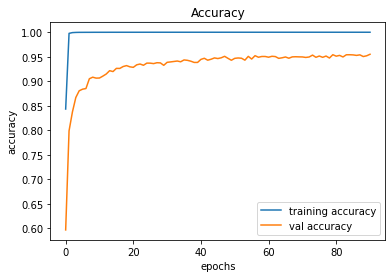

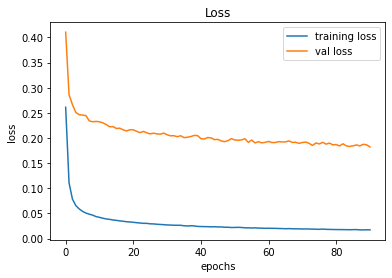

In [8]:
import matplotlib.pyplot as plt

plt.figure(0)
plt.plot(history.history['acc'], label='training accuracy')
plt.plot(history.history['val_acc'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [9]:
res = model.predict(X_train[51196:51204])
print(res.shape)
print(res[0], res[1], res[2] ,res[3], res[4], res[5],res[6], res[7])

(8, 1, 1)
[[1.0322489]] [[0.9682133]] [[0.9668282]] [[0.9955977]] [[-0.01044551]] [[-0.00107235]] [[-0.0075238]] [[0.04027221]]


In [10]:
res = model.predict(X_train[102396:102404])
print(res.shape)
print(res[0], res[1], res[2] ,res[3], res[4], res[5],res[6], res[7])

(8, 1, 1)
[[-0.02119496]] [[0.00708434]] [[0.01174393]] [[0.00240096]] [[0.98646736]] [[1.0030068]] [[1.0060369]] [[1.0126548]]


In [11]:
res = model.predict(X_train[102396:102397])
print(res.shape)
print(res[0])

(1, 1, 1)
[[-0.02119493]]


In [12]:
res = model.predict(X_train[102403:102404])
print(res.shape)
print(res[0])

(1, 1, 1)
[[1.0126548]]


In [44]:
# from sklearn.metrics import confusion_matrix, classification_report

# y_pred = model.predict(X_test)
# print(y_test.shape)
# print(y_pred.shape)
# print(classification_report(y_test, y_pred))

In [49]:
# from keras.models import load_model
# filename = 'lstm_model.h5'
# model.save(filename)
# model = load_model('lstm_model.h5')

In [3]:
from keras.models import load_model
model = load_model('lstm_model.h5')

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 1, 400)            550400    
_________________________________________________________________
time_distributed (TimeDistri (None, 1, 1)              401       
Total params: 550,801
Trainable params: 550,801
Non-trainable params: 0
_________________________________________________________________
